# Data Handling in Python Workshop | University Research Computing
#### Instructor: Mahmood M. Shad | University Research Computing 
#### Date: 04/05/2023

#### Resources:
- [Python for Data Analysis](https://www.oreilly.com/library/view/python-for-data/9781491957653/)
- [Parallel Computing on FASRC CANNON Cluster](https://docs.rc.fas.harvard.edu/kb/parallel-computing-on-odyssey/)

## List of Topics
- Python Data Types: Collections
- File I/O
- Parallel Data Processing

### Python Data Types: Collections
#### List Comprehensions

In [1]:
# Build sequences from other sequences

l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

%time res1 = [ x**2 for x in l if isinstance(x, int) ]

# x**2                       :: output expression
# x                          :: variable
# l                          :: input sequence
# if isinstance(x, int)      :: optional predicate


# NOTE: Same results by map, filter, lambda
# lambda(variable : equation, list)

%time res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))


print(res1 == res2)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs
CPU times: user 8 µs, sys: 3 µs, total: 11 µs
Wall time: 12.2 µs
True


Please Note:   
**Wall time** means that a clock hanging on a wall outside of the computer would measure X ms from the time the code was submitted to the CPU to the time when the process completed.

**User time** and sys time both refer to time taken by the CPU to actually work on the code. The CPU time dedicated to our code is only a fraction of the wall time as the CPU swaps its attention from our code to other processes that are running on the system.

**User time** is the amount of CPU time taken outside of the kernel.

**Sys time** is the amount of time taken inside of the kernel. 

**Total** CPU time is user time + sys time.

In [2]:
# %timeit vs %time
l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

%timeit res1 = [ x**2 for x in l if isinstance(x, int) ]
%timeit res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))


640 ns ± 8.69 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.33 µs ± 7.01 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [3]:
%%time

print("time the whole cell using %%time built-in function")
l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

res1 = [ x**2 for x in l if isinstance(x, int) ]
res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))
print(res1 == res2)

time the whole cell using %%time built-in function
True
CPU times: user 230 µs, sys: 0 ns, total: 230 µs
Wall time: 179 µs


In [4]:
%%prun

print("profile the whole cell using %%prun built-in function")
l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

res1 = [ x**2 for x in l if isinstance(x, int) ]
res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))
print(res1 == res2)

profile the whole cell using %%prun built-in function
True
 

         82 function calls in 0.001 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        4    0.000    0.000    0.000    0.000 iostream.py:535(write)
        1    0.000    0.000    0.000    0.000 iostream.py:203(schedule)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 socket.py:613(send)
        2    0.000    0.000    0.000    0.000 {built-in method builtins.print}
        1    0.000    0.000    0.000    0.000 threading.py:1185(is_alive)
        4    0.000    0.000    0.000    0.000 iostream.py:465(_schedule_flush)
        4    0.000    0.000    0.000    0.000 iostream.py:444(_is_master_process)
        1    0.000    0.000    0.000    0.000 <string>:4(<listcomp>)
       28    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
       12    0.000    0.000    0.0

**ncalls** : the number of calls,

**tottime** : the total time spent in the given function (and excluding time made in calls to sub-functions),

**percall** : the quotient of *tottime* divided by *ncalls*

**cumtime** : the total time spent in this and all subfunctions (from invocation till exit). This figure is accurate even for recursive functions.

**percall** is the quotient of *cumtime* divided by primitive calls

**NOTE:** Read more about the built-in magic commands in `IPython` [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html). 

In [5]:
# Load an IPython extension by its module name.
%load_ext snakeviz

In [6]:
def test():
    l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

    res1 = [ x**2 for x in l if isinstance(x, int) ]
    res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))
    print(res1 == res2)

In [7]:
%snakeviz test()

True
 
*** Profile stats marshalled to file '/tmp/tmp14qh8slc'.
Embedding SnakeViz in this document...


In [8]:
%%time

# Nested Comprehensions
[ [ 1 if i == row_i else 0 for i in range(0, 10) ] for row_i in range(0, 10) ]

# Use zip() to work with two or more elements at a time
[(v,w) for v,w in zip([1,2,3], [4,5,6])]

CPU times: user 166 µs, sys: 0 ns, total: 166 µs
Wall time: 174 µs


[(1, 4), (2, 5), (3, 6)]

#### Set Comprehensions
Similar to list comprehensions but it outputs sets.

In [9]:
l = [1, 4, 9, 'aa', 0, 4, 'bb', 5, 5, 'aa', 'bb', 1]
res = {i for i in l}
print(res)

{0, 1, 4, 5, 9, 'bb', 'aa'}


#### Dictionary Comprehensions
Similar to list comprehensions but it outputs dictionaries.

In [10]:
# Get frequency of keys and ignore lowercase/uppercase
d = {'b':20, 'c': 40, 'B': 50, 'Z':30}

d_freq = { i.lower() : d.get(i.lower(), 0) + d.get(i.upper(), 0) for i in d.keys() }

print(d)
print(d_freq)

{'b': 20, 'c': 40, 'B': 50, 'Z': 30}
{'b': 70, 'c': 40, 'z': 30}


#### Function map(), apply(), applymap()

In [11]:
def xsq(x):
    return x**2

l1 = [i for i in range(10**5)]

%time list(map(xsq, l1))
%time list(map(lambda x: x**2, l1))


l2 = ['cat', 'dog', 'bird', 'horse']
print(list(map(list,l2)))

CPU times: user 5.28 ms, sys: 4.03 ms, total: 9.31 ms
Wall time: 9.25 ms
CPU times: user 5.08 ms, sys: 1.01 ms, total: 6.08 ms
Wall time: 5.86 ms
[['c', 'a', 't'], ['d', 'o', 'g'], ['b', 'i', 'r', 'd'], ['h', 'o', 'r', 's', 'e']]


In [12]:
# dataframe map
import pandas as pd
df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
del df['species']

f = lambda x: x.max() - x.min()
format = lambda x: '%.2f' % x

# map() function
%time print ( pd.Series(map(format, df['sepal_length'])) ) 

# map works element-wise on a series
%time print( df['sepal_length'].map(format) )

# applymap works element-wise on a dataframe
%time print ( df.applymap(format) )

# apply works on row/column basis
%time print ( df.apply(f, axis=0) )    # 0: column, 1: row

0      5.10
1      4.90
2      4.70
3      4.60
4      5.00
       ... 
145    6.70
146    6.30
147    6.50
148    6.20
149    5.90
Length: 150, dtype: object
CPU times: user 2.16 ms, sys: 5 µs, total: 2.16 ms
Wall time: 2.16 ms
0      5.10
1      4.90
2      4.70
3      4.60
4      5.00
       ... 
145    6.70
146    6.30
147    6.50
148    6.20
149    5.90
Name: sepal_length, Length: 150, dtype: object
CPU times: user 1.03 ms, sys: 1 µs, total: 1.04 ms
Wall time: 1.01 ms
    sepal_length sepal_width petal_length petal_width
0           5.10        3.50         1.40        0.20
1           4.90        3.00         1.40        0.20
2           4.70        3.20         1.30        0.20
3           4.60        3.10         1.50        0.20
4           5.00        3.60         1.40        0.20
..           ...         ...          ...         ...
145         6.70        3.00         5.20        2.30
146         6.30        2.50         5.00        1.90
147         6.50        3.00        

Overall ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Kernels ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:01

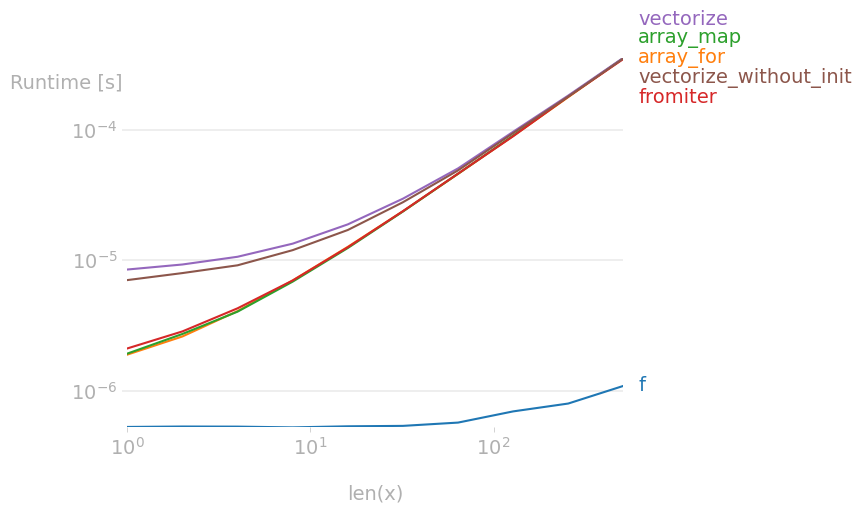

In [13]:
# Example on numpy array

import numpy as np
import perfplot
import math

def f(x):
    # return math.sqrt(x)
    return np.sqrt(x)

vf = np.vectorize(f)

def array_for(x):
    return np.array([f(xi) for xi in x])

def array_map(x):
    return np.array(list(map(f, x)))

def fromiter(x):
    return np.fromiter((f(xi) for xi in x), x.dtype)

def vectorize(x):
    return np.vectorize(f)(x)

def vectorize_without_init(x):
    return vf(x)

perfplot.show(
    setup=lambda n: np.random.rand(n),
    n_range=[2 ** k for k in range(10)],
    kernels=[f, array_for, array_map, fromiter, vectorize, vectorize_without_init],
    xlabel="len(x)",
)

#### Iterators & Generators

In [14]:
# Iterators

l = [1, 20, 3, 40, 5, 60]
it = iter(l)

print( next(it) )
print( it.__next__() )

1
20


In [15]:
# Generators
import random
import time

def lot():
    for i in range(4):
        yield random.randint(100, 200)
        time.sleep(2)
        

for r in lot():
       print("Next random number is: %d" %(r))

Next random number is: 159
Next random number is: 179
Next random number is: 145
Next random number is: 112


### I/O Operation
We want efficiency and flexibility in I/O operations!
- Pickle (serialized storage)
- I/O on Text
- SQL Database
- PyTables I/O Operations

#### Pickle :: Serialized storage

In [17]:
# pickle module serializes the python object for faster r/w.
import pickle
import numpy as np
from random import gauss

dat1 = [gauss(1.5, 2) for i in range(1000000)]

file = open("ser_data.pkl", 'wb')

# data variable is serialized to a "byte stream" and dumped to disk
%time pickle.dump(dat1, file)

# retrieving deserialized data from pickle file
%time dat2 = pickle.load(open( "ser_data.pkl", "rb" ))

np.allclose(np.array(dat1), np.array(dat2), rtol=1e-05, atol=1e-08)  # relative / absolute

CPU times: user 24.3 ms, sys: 5.04 ms, total: 29.3 ms
Wall time: 29.4 ms
CPU times: user 39.4 ms, sys: 17.3 ms, total: 56.7 ms
Wall time: 138 ms


False

In [18]:
%%time
with open('nonser_data.dat', 'w') as f:
    for item in dat1:
        f.write("%s\n" % item)

CPU times: user 670 ms, sys: 23 ms, total: 693 ms
Wall time: 867 ms


#### I/O on Text
Pandas library is preferred over built-in Python commands for text data processing.  
Formats: JSON, SQL, CSV, XLS/XLSX, HTML

In [19]:
import pandas as pd
df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

%time df.to_csv('csvdata.csv')

# And to read the files back from the disk
%time dat3 = pd.read_csv('csvdata.csv')

CPU times: user 5.16 ms, sys: 37 µs, total: 5.2 ms
Wall time: 28.3 ms
CPU times: user 3.46 ms, sys: 0 ns, total: 3.46 ms
Wall time: 7.77 ms


#### SQL Database
Python supports both SQL and NoSQL databases. It support SQL through its SQLite3.

In [20]:
import sqlite3 as sq

# Creating table
query = 'CREATE TABLE TEST_TABLE (N1 real, N2 real, N3 real)'
con = sq.connect('test_sqldb.db')
con.execute(query)
con.commit()

In [21]:
%%time

# Saving data 
data = np.random.standard_normal((1000000, 3))

con.executemany('INSERT INTO TEST_TABLE VALUES (?, ?, ?)', data)
con.commit()

CPU times: user 1.89 s, sys: 56.9 ms, total: 1.95 s
Wall time: 2.3 s


In [22]:
%%time
# Reading data is faster
con.execute('SELECT * FROM TEST_TABLE').fetchall()[0]

CPU times: user 789 ms, sys: 108 ms, total: 897 ms
Wall time: 1.64 s


(0.29887294731964253, -0.4082188277124095, -1.0012870628249613)

In [23]:
%%time
# Save directly to Numpy
np_query = 'SELECT * FROM TEST_TABLE WHERE N1 > 0 AND N2 < 0'
np.array(con.execute(np_query).fetchall()).round(3)[0]

CPU times: user 481 ms, sys: 55.5 ms, total: 536 ms
Wall time: 1.61 s


array([ 0.299, -0.408, -1.001])

In [24]:
# load data directly to Pandas data format
import pandas.io.sql as pds
df = pds.read_sql('SELECT * FROM TEST_TABLE', con)

# Much faster with Pandas in-memory processing
%time df[(df['N1'] > 0) & (df['N2'] < 0)].head()

# NOTE: Pandas CANNOT completely replaces SQL.

CPU times: user 10.1 ms, sys: 1e+03 ns, total: 10.1 ms
Wall time: 10.1 ms


,N1,N2,N3
0,0.298873,-0.408219,-1.001287
4,0.616895,-0.190583,-1.881283
16,0.876708,-0.561374,-0.860843
17,1.068579,-0.195444,1.476976
22,1.098516,-0.705406,-1.550887


#### PyTables I/O Operations
PyTables is a Python binding for the HDF5 format.

In [25]:
import tables as tb
file = 'tab.h5'
h5 = tb.open_file(file, 'w')

# creating rows for the db
rows = 2000000
table_model = { 'N1': tb.IntCol(pos=1), 'N2': tb.IntCol(pos=2) }
filters = tb.Filters(complevel=0)  # no compression 
table = h5.create_table('/', 'ints', table_model, title='Integers', expectedrows=rows, filters=filters)

print(table)

/ints (Table(0,)) 'Integers'


In [26]:
%%time
# populate table with random numbers
ran_int = np.random.randint(0, 10000, size=(rows, 2))

pointer = table.row              # get a pointer to the Row
for i in range(rows):
  pointer['N1'] = ran_int[i, 0]
  pointer['N2'] = ran_int[i, 1]
  pointer.append()               # append data and move pointer one row
table.flush()

print(table)

/ints (Table(2000000,)) 'Integers'
CPU times: user 1.14 s, sys: 22.8 ms, total: 1.16 s
Wall time: 1.16 s


In [27]:
%%time

# Using Numpy structured array   :: FASTER
dty = np.dtype([('N1', 'i4'), ('N2', '<i4')])
sarray = np.zeros(len(ran_int), dtype=dty)

h5.create_table('/', 'np_array', sarray, title='Integers', expectedrows=rows, filters=filters)
print(h5)

tab.h5 (File) ''
Last modif.: '2023-04-05T00:40:25+00:00'
Object Tree: 
/ (RootGroup) ''
/ints (Table(2000000,)) 'Integers'
/np_array (Table(2000000,)) 'Integers'

CPU times: user 8.08 ms, sys: 24.1 ms, total: 32.2 ms
Wall time: 163 ms


In [28]:
# delete duplicate table

h5.remove_node('/', 'np_array')
print(h5)

tab.h5 (File) ''
Last modif.: '2023-04-05T00:40:28+00:00'
Object Tree: 
/ (RootGroup) ''
/ints (Table(2000000,)) 'Integers'



In [29]:
# close it before re-opening again
h5.close()

**NOTE**: Pandas and PyTables are optimized speed for **I/O** operations.

**Question**: When I should use `SQL databases` over `NumPy ndarray-based` or `pandas DataFrame-based` methods?


### Parallel Processing
Python packages such as Numpy, Scipy and Pandas utilize `OpenMP` to run on multiple CPUs on a shared-memory space.

- **`-N`**: number of Nodes
- **`--ntasks` or `n`**: number of instances of your command being executed (number of MPI ranks for a common cluster)
- **`--cpus-per-task` or `c`**: how many CPU cores each task can use, *${SLURM_CPUS_PER_TASK}*

Parallel Job Categories:
- Fine grained
- Coarse grained
- Embarrassingly Parallel

Terms:
- **MPI**      : multiple CPU cores in same/different nodes working independently and communicating on demand
- **Threads**  : Python libraries using mulithreading :: Numpy, Scipy, Pandas
- **Tasks**    : Processing too many data files :: csv, HDF5

In [30]:
# Get # of CPU cores per task

%env SLURM_CPUS_PER_TASK

'8'

In [31]:
import os
from time import time
import numpy as np

print('Using %d processors' % int(os.getenv('SLURM_CPUS_PER_TASK',1)))

nrounds = 5

t_start = time()

for i in range(nrounds):
    a = np.random.random([2000,2000])
    a = a + a.T
    b = np.linalg.pinv(a) # compute (Moore-Penrose) pseudo-inverse of a matrix

t_delta = time() - t_start

print('Seconds taken to invert %d symmetric 2000x2000 matrices: %f' % (nrounds, t_delta))

Using 8 processors
Seconds taken to invert 5 symmetric 2000x2000 matrices: 19.728554


In [32]:
!python python_openmp.py

Using 8 processors
Seconds taken to invert 5 symmetric 2000x2000 matrices: 19.928131


#### Array Job SLURM Script

[More Information](https://docs.rc.fas.harvard.edu/kb/parallel-computing-on-odyssey/)